# Euler Demo

This is an example of a report-style code that you'll be writing for this class. In this case, the report is written using Matlab/Octave, but you can use Python, Julia, or Matlab/Octave. For theoretical reports, you'll use either Markdown or LaTeX (your choice).

In this example, we'll integrate a Curtiss-Hirschfelder equation, given by $$y' = -5[y-\cos(t)]$$

Let's define the function specifying the ODE.

In [1]:
CHE = @(y,t)-5*(y-cos(t));

This is now a function that we can plot against $t$ and $y$ to get the value of the slope.

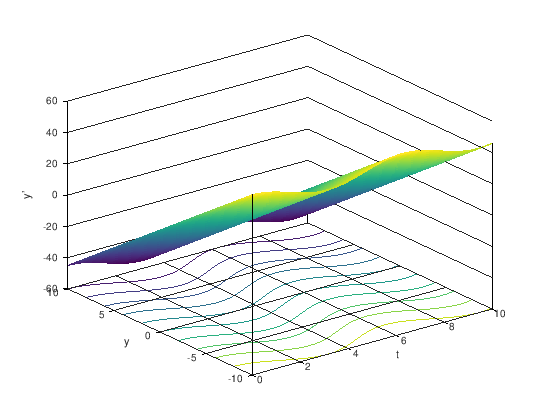

In [2]:
t = 0:0.1:10; #define the grid time vs state
y = -10:0.1:10;
[T,Y] = meshgrid(t,y);

YP = CHE(Y,T); # evaluate the derivative on the grid

surfc(T,Y, YP); shading interp; # plot the value of the slope
xlabel('t');
ylabel('y');
zlabel(' y'' ');

Now, to numerically integrate this equation, we need to define a function that _takes_ the function `CHE` as _argument_ (in addition to initial condition, time step, and duration of simulation).

In [3]:
function [x,t] = fwd_euler(f, x0, dt, tstart, tend)

t = tstart:dt:tend; % define the time vector
x = nan([size(t),1]); % state vector should have the same length as the time vector x number of states (1)
x(1) = x0;

    for k=2:length(t)
        x(k) = x(k-1)+dt*f(x(k-1), t(k-1)); % evaluate forward Euler update.
    end

end


This function doesn't do anything on its own. We have to call it and then plot the results.

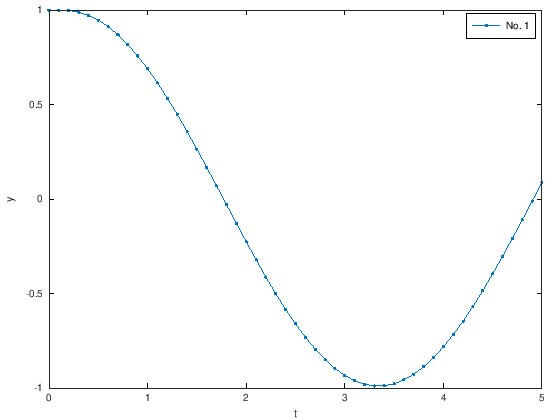

In [4]:
[y1,t1] = fwd_euler( CHE, 1, 0.1, 0, 5);
plot(t1, y1, 'Marker','.','DisplayName','No. 1')
xlabel('t'); ylabel('y');
legend('Location','NorthEast')

We can add a few more initial conditions and time steps.

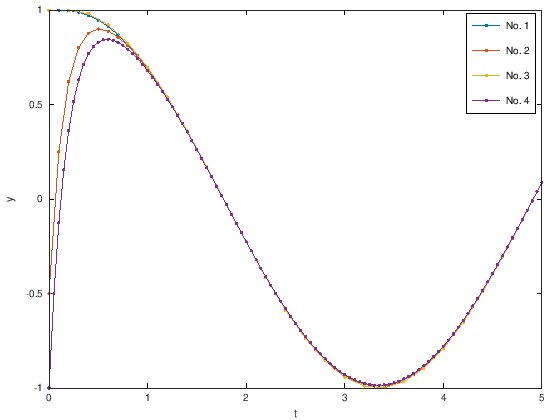

In [5]:
[y2,t2] = fwd_euler(CHE, -0.5, 0.1, 0,5);
[y3,t3] = fwd_euler(CHE, 1, 0.2, 0,5);
[y4,t4] = fwd_euler(CHE, -1, 0.05, 0,5);
plot(t1, y1, 'Marker','.','DisplayName','No. 1'), hold on;
plot(t2, y2, 'Marker','.','DisplayName','No. 2')
plot(t3, y3, 'Marker','.','DisplayName','No. 3')
plot(t4, y4, 'Marker','.','DisplayName','No. 4'), hold off;

xlabel('t'); ylabel('y');
legend('Location','NorthEast')

It looks like all solutions collapse onto the same curve. Well, that's not really what we're interested, we'll be interested in understanding why *increasing* the time step seems to destroy things... Let's take the first initial condition but simulate it with a timestep of `dt=0.5`.

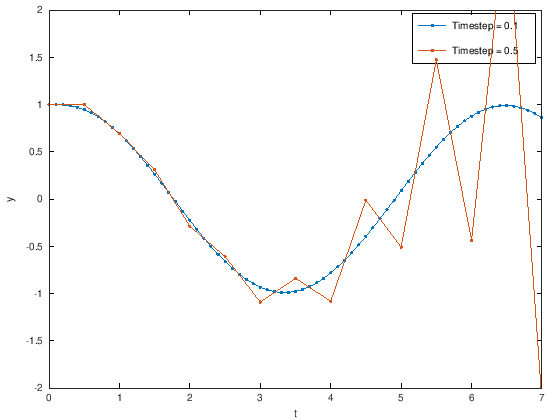

In [6]:
[y1,t1] = fwd_euler( CHE, 1, 0.1, 0, 7);
[y5,t5] = fwd_euler( CHE, 1, 0.5, 0, 7);
plot(t1, y1, 'Marker','.','DisplayName','Timestep = 0.1'); hold on;
plot(t5, y5, 'Marker','.','DisplayName','Timestep = 0.5'); hold off;
xlabel('t'); ylabel('y');
legend('Location','NorthEast')
ylim([-2,2]);

Ooops... that's no good.